In [67]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,export_text,plot_tree
from sklearn import metrics
from yellowbrick.classifier import ROCAUC
from yellowbrick.model_selection import ValidationCurve
import matplotlib.pyplot as plt
import seaborn as sns

### Example 1

#### Load data

In [68]:
# Assigning features and label variables
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [69]:
data=pd.DataFrame()
data['weather']=weather
data['temp']=temp
data['play']=play
data

,weather,temp,play
0,Sunny,Hot,No
1,Sunny,Hot,No
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes
5,Rainy,Cool,No
6,Overcast,Cool,Yes
7,Sunny,Mild,No
8,Sunny,Cool,Yes
9,Rainy,Mild,Yes


In [70]:
data1=data.copy()
data1=pd.get_dummies(data1,columns=['weather','temp'])
data1

,play,weather_Overcast,weather_Rainy,weather_Sunny,temp_Cool,temp_Hot,temp_Mild
0,No,0,0,1,0,1,0
1,No,0,0,1,0,1,0
2,Yes,1,0,0,0,1,0
3,Yes,0,1,0,0,0,1
4,Yes,0,1,0,1,0,0
5,No,0,1,0,1,0,0
6,Yes,1,0,0,1,0,0
7,No,0,0,1,0,0,1
8,Yes,0,0,1,1,0,0
9,Yes,0,1,0,0,0,1


In [71]:
data2=data.copy()
encoder=OneHotEncoder(dtype=np.int32,handle_unknown="ignore")


In [72]:
data2=pd.DataFrame(encoder.fit_transform(data2[['weather','temp']]).toarray(),columns=np.array(encoder.categories_).flatten())

In [73]:
data2

,Overcast,Rainy,Sunny,Cool,Hot,Mild
0,0,0,1,0,1,0
1,0,0,1,0,1,0
2,1,0,0,0,1,0
3,0,1,0,0,0,1
4,0,1,0,1,0,0
5,0,1,0,1,0,0
6,1,0,0,1,0,0
7,0,0,1,0,0,1
8,0,0,1,1,0,0
9,0,1,0,0,0,1


In [74]:
print(data2)

    Overcast  Rainy  Sunny  Cool  Hot  Mild
0          0      0      1     0    1     0
1          0      0      1     0    1     0
2          1      0      0     0    1     0
3          0      1      0     0    0     1
4          0      1      0     1    0     0
5          0      1      0     1    0     0
6          1      0      0     1    0     0
7          0      0      1     0    0     1
8          0      0      1     1    0     0
9          0      1      0     0    0     1
10         0      0      1     0    0     1
11         1      0      0     0    0     1
12         1      0      0     0    1     0
13         0      1      0     0    0     1


In [75]:
data['play']

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: play, dtype: object

In [130]:
data2

,weather,temp,play,weather_encoded,temp_encoded,play_encoded
0,Sunny,Hot,No,2,1,0
1,Sunny,Hot,No,2,1,0
2,Overcast,Hot,Yes,0,1,1
3,Rainy,Mild,Yes,1,2,1
4,Rainy,Cool,Yes,1,0,1
5,Rainy,Cool,No,1,0,0
6,Overcast,Cool,Yes,0,0,1
7,Sunny,Mild,No,2,2,0
8,Sunny,Cool,Yes,2,0,1
9,Rainy,Mild,Yes,1,2,1


In [76]:
DT1= DecisionTreeClassifier(criterion='entropy',splitter='best',
max_depth=None,min_samples_split=2,min_samples_leaf=1)
# Train the model using the training sets
DT1.fit(data2,data['play'])

DecisionTreeClassifier(criterion='entropy')

In [77]:
#Predict Output
data2['play_predicted']= DT1.predict(data2)
data2['play']=data['play']
data2

,Overcast,Rainy,Sunny,Cool,Hot,Mild,play_predicted,play
0,0,0,1,0,1,0,No,No
1,0,0,1,0,1,0,No,No
2,1,0,0,0,1,0,Yes,Yes
3,0,1,0,0,0,1,Yes,Yes
4,0,1,0,1,0,0,No,Yes
5,0,1,0,1,0,0,No,No
6,1,0,0,1,0,0,Yes,Yes
7,0,0,1,0,0,1,No,No
8,0,0,1,1,0,0,Yes,Yes
9,0,1,0,0,0,1,Yes,Yes


In [78]:
print("Classification Report: \n",metrics.classification_report(data2['play'],data2['play_predicted']),'\n')

Classification Report: 
               precision    recall  f1-score   support

          No       0.67      0.80      0.73         5
         Yes       0.88      0.78      0.82         9

    accuracy                           0.79        14
   macro avg       0.77      0.79      0.78        14
weighted avg       0.80      0.79      0.79        14
 



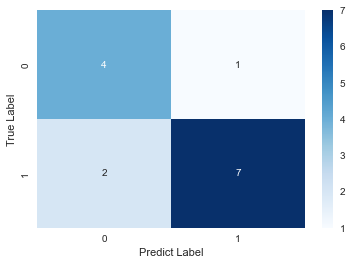

In [79]:
cf=metrics.confusion_matrix(data2['play'],data2['play_predicted']).round(3)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

In [80]:
print(export_text(DT1))

|--- feature_0 <= 0.50
|   |--- feature_4 <= 0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- class: No
|   |   |   |--- feature_1 >  0.50
|   |   |   |   |--- class: Yes
|   |   |--- feature_3 >  0.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- class: Yes
|   |   |   |--- feature_1 >  0.50
|   |   |   |   |--- class: No
|   |--- feature_4 >  0.50
|   |   |--- class: No
|--- feature_0 >  0.50
|   |--- class: Yes



[Text(0.75, 0.9, 'Overcast <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]\nclass = Yes'),
 Text(0.625, 0.7, 'Hot <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]\nclass = No'),
 Text(0.5, 0.5, 'Cool <= 0.5\nentropy = 0.954\nsamples = 8\nvalue = [3, 5]\nclass = Yes'),
 Text(0.25, 0.3, 'Rainy <= 0.5\nentropy = 0.971\nsamples = 5\nvalue = [2, 3]\nclass = Yes'),
 Text(0.125, 0.1, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = No'),
 Text(0.375, 0.1, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]\nclass = Yes'),
 Text(0.75, 0.3, 'Rainy <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]\nclass = Yes'),
 Text(0.625, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(0.875, 0.1, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = No'),
 Text(0.75, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = No'),
 Text(0.875, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Yes')]

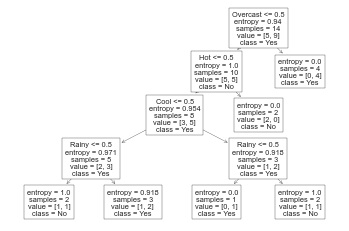

In [81]:
plot_tree(DT1,feature_names=data2.columns,class_names=DT1.classes_)

In [82]:
DT1.classes_

array(['No', 'Yes'], dtype=object)

In [83]:
DT1.feature_importances_

array([0.49367237, 0.13336519, 0.        , 0.00403044, 0.368932  ,
       0.        ])

In [84]:
test=pd.DataFrame({'weather':['Overcast','Overcast','Overcast','Rainy','Rainy','Rainy','Sunny','Sunny','Sunny'],
'temp':['Cool','Mild','Hot','Cool','Mild','Hot','Cool','Mild','Hot']})

In [85]:
test

,weather,temp
0,Overcast,Cool
1,Overcast,Mild
2,Overcast,Hot
3,Rainy,Cool
4,Rainy,Mild
5,Rainy,Hot
6,Sunny,Cool
7,Sunny,Mild
8,Sunny,Hot


In [86]:
test=pd.DataFrame(encoder.transform(test).toarray(),columns=np.array(encoder.categories_).flatten())
test

,Overcast,Rainy,Sunny,Cool,Hot,Mild
0,1,0,0,1,0,0
1,1,0,0,0,0,1
2,1,0,0,0,1,0
3,0,1,0,1,0,0
4,0,1,0,0,0,1
5,0,1,0,0,1,0
6,0,0,1,1,0,0
7,0,0,1,0,0,1
8,0,0,1,0,1,0


In [87]:
test['play_predicted']=DT1.predict(test)
test

,Overcast,Rainy,Sunny,Cool,Hot,Mild,play_predicted
0,1,0,0,1,0,0,Yes
1,1,0,0,0,0,1,Yes
2,1,0,0,0,1,0,Yes
3,0,1,0,1,0,0,No
4,0,1,0,0,0,1,Yes
5,0,1,0,0,1,0,No
6,0,0,1,1,0,0,Yes
7,0,0,1,0,0,1,No
8,0,0,1,0,1,0,No


In [88]:
data2=pd.DataFrame()
data2['weather']=weather
data2['temp']=temp
data2['play']=play
data2

,weather,temp,play
0,Sunny,Hot,No
1,Sunny,Hot,No
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes
5,Rainy,Cool,No
6,Overcast,Cool,Yes
7,Sunny,Mild,No
8,Sunny,Cool,Yes
9,Rainy,Mild,Yes


In [89]:
from sklearn.preprocessing import LabelEncoder
# creating labelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
# Converting string labels into numbers.
data2['weather_encoded']=le1.fit_transform(data2['weather'])
data2['temp_encoded']=le2.fit_transform(data2['temp'])
data2['play_encoded']=le3.fit_transform(data2['play'])
data2

,weather,temp,play,weather_encoded,temp_encoded,play_encoded
0,Sunny,Hot,No,2,1,0
1,Sunny,Hot,No,2,1,0
2,Overcast,Hot,Yes,0,1,1
3,Rainy,Mild,Yes,1,2,1
4,Rainy,Cool,Yes,1,0,1
5,Rainy,Cool,No,1,0,0
6,Overcast,Cool,Yes,0,0,1
7,Sunny,Mild,No,2,2,0
8,Sunny,Cool,Yes,2,0,1
9,Rainy,Mild,Yes,1,2,1


In [90]:
DT3= DecisionTreeClassifier(criterion='entropy',splitter='best',
max_depth=None,min_samples_split=2,min_samples_leaf=1)
# Train the model using the training sets
DT3.fit(data2[['weather_encoded','temp_encoded']],data2['play'])

DecisionTreeClassifier(criterion='entropy')

In [91]:
print(export_text(DT3))

|--- feature_0 <= 0.50
|   |--- class: Yes
|--- feature_0 >  0.50
|   |--- feature_1 <= 0.50
|   |   |--- feature_0 <= 1.50
|   |   |   |--- class: No
|   |   |--- feature_0 >  1.50
|   |   |   |--- class: Yes
|   |--- feature_1 >  0.50
|   |   |--- feature_1 <= 1.50
|   |   |   |--- class: No
|   |   |--- feature_1 >  1.50
|   |   |   |--- feature_0 <= 1.50
|   |   |   |   |--- class: Yes
|   |   |   |--- feature_0 >  1.50
|   |   |   |   |--- class: No



### Example 2

#### Load data

In [92]:
wine = datasets.load_wine()

In [93]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [94]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [95]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [96]:
print(wine.DESCR,'\n')

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [97]:
data=pd.DataFrame(wine.data,columns=wine.feature_names)
target=pd.DataFrame(wine.target,columns=['class'])

In [98]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [99]:
target.head()

,class
0,0
1,0
2,0
3,0
4,0


#### Explore Data

In [100]:
data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [101]:
data.shape

(178, 13)

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [103]:
data.describe().round(1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0
mean,13.0,2.3,2.4,19.5,99.7,2.3,2.0,0.4,1.6,5.1,1.0,2.6,746.9
std,0.8,1.1,0.3,3.3,14.3,0.6,1.0,0.1,0.6,2.3,0.2,0.7,314.9
min,11.0,0.7,1.4,10.6,70.0,1.0,0.3,0.1,0.4,1.3,0.5,1.3,278.0
25%,12.4,1.6,2.2,17.2,88.0,1.7,1.2,0.3,1.2,3.2,0.8,1.9,500.5
50%,13.0,1.9,2.4,19.5,98.0,2.4,2.1,0.3,1.6,4.7,1.0,2.8,673.5
75%,13.7,3.1,2.6,21.5,107.0,2.8,2.9,0.4,2.0,6.2,1.1,3.2,985.0
max,14.8,5.8,3.2,30.0,162.0,3.9,5.1,0.7,3.6,13.0,1.7,4.0,1680.0


array([[<AxesSubplot: title={'center': 'alcohol'}>,
        <AxesSubplot: title={'center': 'malic_acid'}>,
        <AxesSubplot: title={'center': 'ash'}>,
        <AxesSubplot: title={'center': 'alcalinity_of_ash'}>],
       [<AxesSubplot: title={'center': 'magnesium'}>,
        <AxesSubplot: title={'center': 'total_phenols'}>,
        <AxesSubplot: title={'center': 'flavanoids'}>,
        <AxesSubplot: title={'center': 'nonflavanoid_phenols'}>],
       [<AxesSubplot: title={'center': 'proanthocyanins'}>,
        <AxesSubplot: title={'center': 'color_intensity'}>,
        <AxesSubplot: title={'center': 'hue'}>,
        <AxesSubplot: title={'center': 'od280/od315_of_diluted_wines'}>],
       [<AxesSubplot: title={'center': 'proline'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

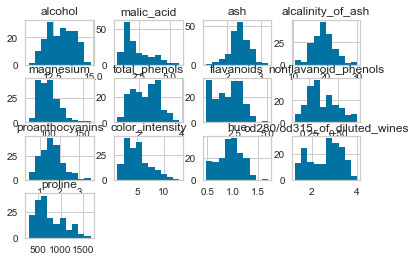

In [104]:
data.hist()

In [105]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   178 non-null    int64
dtypes: int64(1)
memory usage: 1.5 KB


In [106]:
target.value_counts()

class
1        71
0        59
2        48
dtype: int64

#### Preprocess data

In [107]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [108]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3,shuffle=True,stratify=target,random_state=100)

In [109]:
X_train.shape

(124, 13)

In [110]:
X_test.shape

(54, 13)

In [111]:
y_train.value_counts()

class
1        50
0        41
2        33
dtype: int64

In [112]:
y_test.value_counts()

class
1        21
0        18
2        15
dtype: int64

In [113]:
y_test.sort_index().head()

,class
2,0
3,0
8,0
10,0
14,0


#### Model

#### DT2: without gridsearchcv

In [114]:
#Create DT Classifier
DT2=DecisionTreeClassifier(criterion='entropy',max_depth=4)

#Train the model using the training sets
DT2.fit(X_train, y_train)

#Predict the response for test dataset
y_pred =DT2.predict(X_test)

In [115]:
DT2.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Classification Report: 
               precision    recall  f1-score   support

     class_0       0.90      1.00      0.95        18
     class_1       0.95      0.90      0.93        21
     class_2       1.00      0.93      0.97        15

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54
 

Accuracy on train:   1.0 

Accuracy on test:  0.944 



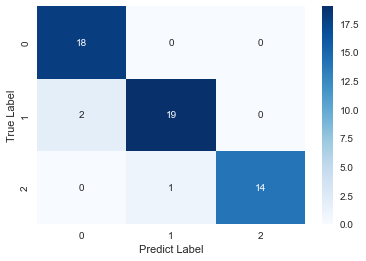

In [116]:
print("Classification Report: \n", metrics.classification_report(y_test,y_pred,target_names=wine.target_names),'\n')
print("Accuracy on train:  ",DT2.score(X_train,y_train).round(3),'\n')
print("Accuracy on test: ",DT2.score(X_test,y_test).round(3),'\n')
cf=metrics.confusion_matrix(y_test,y_pred).round(3)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

In [117]:
print(export_text(DT2,feature_names=X_test.columns.tolist()))

|--- flavanoids <= 1.40
|   |--- color_intensity <= 3.72
|   |   |--- class: 1
|   |--- color_intensity >  3.72
|   |   |--- class: 2
|--- flavanoids >  1.40
|   |--- alcohol <= 12.83
|   |   |--- class: 1
|   |--- alcohol >  12.83
|   |   |--- proline <= 597.50
|   |   |   |--- class: 1
|   |   |--- proline >  597.50
|   |   |   |--- class: 0



In [118]:
DT2.classes_

array([0, 1, 2])

[Text(0.4444444444444444, 0.875, 'flavanoids <= 1.4\nentropy = 1.565\nsamples = 124\nvalue = [41, 50, 33]\nclass = class_1'),
 Text(0.2222222222222222, 0.625, 'color_intensity <= 3.725\nentropy = 0.669\nsamples = 40\nvalue = [0, 7, 33]\nclass = class_2'),
 Text(0.1111111111111111, 0.375, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7, 0]\nclass = class_1'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 33\nvalue = [0, 0, 33]\nclass = class_2'),
 Text(0.6666666666666666, 0.625, 'alcohol <= 12.825\nentropy = 1.0\nsamples = 84\nvalue = [41, 43, 0]\nclass = class_1'),
 Text(0.5555555555555556, 0.375, 'entropy = 0.0\nsamples = 40\nvalue = [0, 40, 0]\nclass = class_1'),
 Text(0.7777777777777778, 0.375, 'proline <= 597.5\nentropy = 0.359\nsamples = 44\nvalue = [41, 3, 0]\nclass = class_0'),
 Text(0.6666666666666666, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = class_1'),
 Text(0.8888888888888888, 0.125, 'entropy = 0.0\nsamples = 41\nvalue = [41, 0, 0]\nclass = class

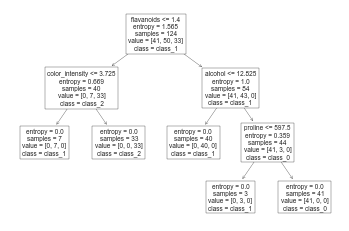

In [119]:
plot_tree(DT2,feature_names=X_test.columns,class_names=wine.target_names)

In [120]:
feature_impact=pd.DataFrame()
feature_impact['features']=X_test.columns
feature_impact['impact']=DT2.feature_importances_
feature_impact

,features,impact
0,alcohol,0.351362
1,malic_acid,0.000000
2,ash,0.000000
3,alcalinity_of_ash,0.000000
4,magnesium,0.000000
5,total_phenols,0.000000
6,flavanoids,0.429254
7,nonflavanoid_phenols,0.000000
8,proanthocyanins,0.000000
9,color_intensity,0.137939


In [121]:
#let find ROC and AUC score
#before we calculate roc_auc_score(), we need to find out the predicted probabilities for test data.
pred_prob = pd.DataFrame(DT2.predict_proba(X_test))
#we'll also add the actual label
test_result=y_test
test_result.columns=['actual']
test_result = test_result.reset_index()
test_result['prob_0'] = pred_prob.iloc[:,0]
test_result['prob_1'] = pred_prob.iloc[:,1]
test_result['prob_2'] = pred_prob.iloc[:,2]
test_result.head()

,index,actual,prob_0,prob_1,prob_2
0,168,2,0.0,0.0,1.0
1,47,0,1.0,0.0,0.0
2,116,1,0.0,1.0,0.0
3,160,2,0.0,0.0,1.0
4,73,1,1.0,0.0,0.0


In [122]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(handle_unknown='ignore')
enc.fit(y_train)
y_test1=pd.DataFrame(enc.transform(y_test).toarray())
y_test1.head()

/Users/jarkrunglerdkriangkrai/opt/anaconda3/envs/bigdata/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- actual
Feature names seen at fit time, yet now missing:
- class

  warnings.warn(message, FutureWarning)


,0,1,2
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0


In [123]:
#accuracy for each class
metrics.roc_auc_score(y_test1,test_result[['prob_0','prob_1','prob_2']],average=None)

array([0.97222222, 0.93722944, 0.96666667])

/Users/jarkrunglerdkriangkrai/opt/anaconda3/envs/bigdata/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


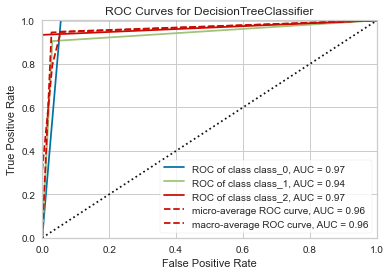

<AxesSubplot: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [124]:
#Fast way to draw ROC curve and calculate AUC accuarcies of each class
#from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(DT2, classes=wine.target_names)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()    

##### DT3: with gridserchcv

In [125]:
DT3=DecisionTreeClassifier()
cv = StratifiedKFold(5)
param_val = [{'criterion':['entropy','gini'],'max_depth':[1,5],'min_samples_split':np.arange(2,10,2)}]
#grid search configuration
grid = GridSearchCV(DT3, param_val, cv = cv,scoring='roc_auc_ovr')
#fitting into our data
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['entropy', 'gini'], 'max_depth': [1, 5],
                          'min_samples_split': array([2, 4, 6, 8])}],
             scoring='roc_auc_ovr')

In [126]:
print(grid.best_score_)
print(grid.best_params_)

0.9500475412387178
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 4}


In [127]:
y_pred_2=grid.predict(X_test)
y_pred_2_prob=grid.predict_proba(X_test)
metrics.roc_auc_score(y_test,y_pred_2_prob,multi_class='ovr')

0.9591269841269842

/Users/jarkrunglerdkriangkrai/opt/anaconda3/envs/bigdata/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


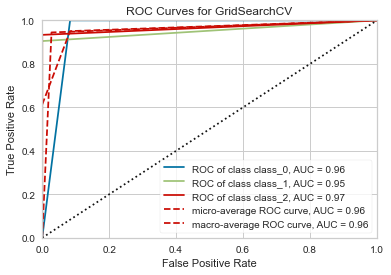

<AxesSubplot: title={'center': 'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [128]:
visualizer = ROCAUC(grid, classes=wine.target_names)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test,y_test)        # Evaluate the model on the test data
visualizer.show()  

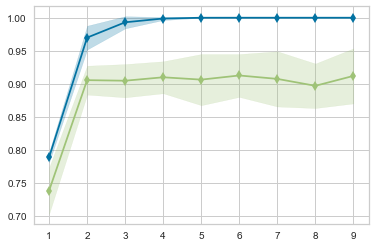

In [129]:
param_range = np.arange(1, 10, 1)
visualizer = ValidationCurve(
    DecisionTreeClassifier(),param_name="max_depth",
    param_range=param_range, cv=cv, scoring='roc_auc_ovr'
)
visualizer.fit(X_train, y_train)
plt.show()
